<h1 style="background-color:green;font-family:newtimeroman;text-align:center;border-radius: 0px 100px"><font color=white size=7>Delivery</h1>

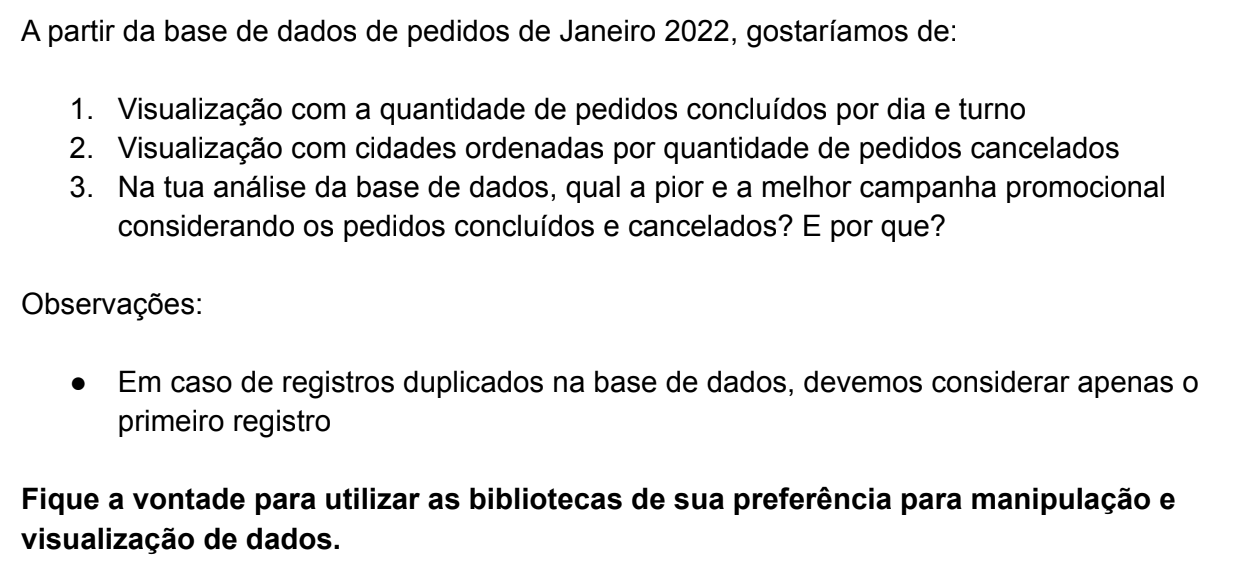

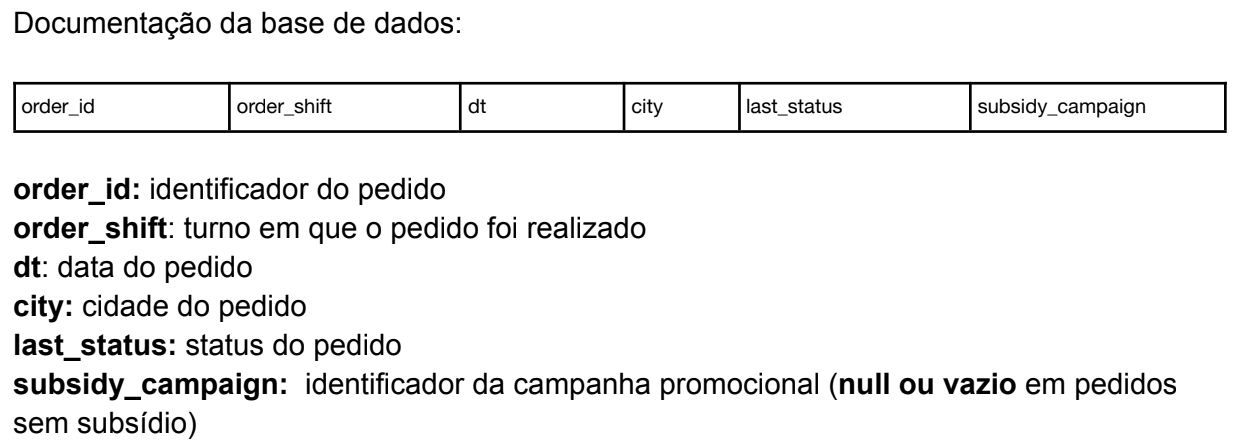

<b>Documentação:</b>
- https://institucional.ifood.com.br/docs/Guia%20de%20Identidade%20Visual%20iFood.pdf
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

<b>Considerações:</b>

Turno
- Manhã: *dawn* e *breakfast*
- Tarde: *lunch* e *snack* 
- Noite: *dinner*

# Bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 00. Análise prévia da base

In [10]:
path = '/Users/felipe.barreto/Downloads/base-tech-challenge-orders.csv'
df = pd.read_csv(path)

In [11]:
df.head(3)

,order_id,order_shift,dt,city,last_status,subsidy_campaign
0,1,weekday lunch,2022-01-28,SAO PAULO,CONCLUDED,NaN
1,2,weekend dinner,2022-01-23,SAO PAULO,CONCLUDED,NaN
2,3,weekday lunch,2022-01-20,SAO PAULO,CONCLUDED,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300152 entries, 0 to 300151
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          300152 non-null  int64 
 1   order_shift       300152 non-null  object
 2   dt                300152 non-null  object
 3   city              300144 non-null  object
 4   last_status       300125 non-null  object
 5   subsidy_campaign  5296 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [ ]:
## Exemplo de como seria as duplicadas
order_id	order_shift	dt	city	last_status	subsidy_campaign
2	weekday lunch	2022-01-28	SAO PAULO	CONCLUDED	NaN
2	weekday lunch	2022-01-27	SAO PAULO	CONCLUDED	NaN

In [14]:
df.order_id.value_counts()

order_id
254       10
109        9
652        6
651        6
462        6
          ..
100011     1
100010     1
100009     1
100008     1
300000     1
Name: count, Length: 300000, dtype: int64

In [15]:
df[df.order_id == 254]

,order_id,order_shift,dt,city,last_status,subsidy_campaign
261,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
262,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
263,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
264,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
265,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
266,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
267,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
268,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
269,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN
270,254,weekend dinner,2022-01-30,SAO PAULO,CONCLUDED,NaN


In [9]:
df_ajustado = df.sort_values(by=['dt'], ascending = True).drop_duplicates(subset=['order_id'])

df_ajustado.head(3)

,order_id,order_shift,dt,city,last_status,subsidy_campaign
7166,7079,weekend dinner,2022-01-02,CAMPINAS,CONCLUDED,NaN
50853,50766,weekend lunch,2022-01-02,SANTO ANDRE,CONCLUDED,NaN
110865,110778,weekend dinner,2022-01-02,OSASCO,CONCLUDED,NaN


# 01. Visualização com a quantidade de pedidos concluídos por dia e turno 

### 1.1 Ajuste dos turnos

In [27]:
df_ajustado.order_shift.unique()

array(['weekend dinner', 'weekend lunch', 'weekend snack',
       'weekend breakfast', 'weekend dawn', 'weekday breakfast',
       'weekday lunch', 'weekday dinner', 'weekday snack', 'weekday dawn'],
      dtype=object)

In [30]:
df_ajustado = df_ajustado.join(
    df_ajustado.order_shift.str.split(pat = " ", expand=True)\
    .rename(
        columns={
           0 : 'week_type',
           1 : 'meal_type'
        }
    )
).drop(['order_shift'], axis = 1)

df_ajustado.head()

,order_id,dt,city,last_status,subsidy_campaign,week_type,meal_type
7166,7079,2022-01-02,CAMPINAS,CONCLUDED,NaN,weekend,dinner
50853,50766,2022-01-02,SANTO ANDRE,CONCLUDED,NaN,weekend,lunch
110865,110778,2022-01-02,OSASCO,CONCLUDED,NaN,weekend,dinner
8497,8410,2022-01-02,JANDIRA,CONCLUDED,NaN,weekend,dinner
166576,166489,2022-01-02,SAO PAULO,DECLINED,NaN,weekend,dinner


In [31]:
df_ajustado.meal_type.unique()

array(['dinner', 'lunch', 'snack', 'breakfast', 'dawn'], dtype=object)

In [36]:
df_ajustado['turno'] = df_ajustado['meal_type']\
    .map({
        'dawn' : 'Manhã',
        'breakfast' : 'Manhã',
        'lunch' : 'Tarde',
        'snack' : 'Tarde',
        'dinner' : 'Noite'
    })

df_ajustado.head()

,order_id,dt,city,last_status,subsidy_campaign,week_type,meal_type,turno
7166,7079,2022-01-02,CAMPINAS,CONCLUDED,NaN,weekend,dinner,Noite
50853,50766,2022-01-02,SANTO ANDRE,CONCLUDED,NaN,weekend,lunch,Tarde
110865,110778,2022-01-02,OSASCO,CONCLUDED,NaN,weekend,dinner,Noite
8497,8410,2022-01-02,JANDIRA,CONCLUDED,NaN,weekend,dinner,Noite
166576,166489,2022-01-02,SAO PAULO,DECLINED,NaN,weekend,dinner,Noite


### 1.2 Agregação por dia e turno

In [60]:
df_agg_dia_turno = df_ajustado[df_ajustado.last_status == 'CONCLUDED']\
    .groupby(['turno','dt'])[['order_id']]\
    .count()\
    .reset_index()\
    .rename(columns={
        'turno':'Turno',
        'dt':'Dia',
        'order_id':'Quantidade'
    })

df_agg_dia_turno.sample(3)

,Turno,Dia,Quantidade
9,Manhã,2022-01-11,380
10,Manhã,2022-01-12,373
76,Tarde,2022-01-18,3879


### 1.3 Agregação por turno

In [67]:
df_agg_turno = df_ajustado[df_ajustado.last_status == 'CONCLUDED']\
    .groupby(['turno'])[['order_id']]\
    .count()\
    .reset_index()\
    .rename(columns={
        'turno':'Turno',
        'order_id':'Quantidade'
    })

total_qtt = df_agg_turno.Quantidade.sum()

df_agg_turno['Quantidade (%)'] = round(100 * df_agg_turno.Quantidade / total_qtt , 2)

df_agg_turno

,Turno,Quantidade,Quantidade (%)
0,Manhã,12744,4.59
1,Noite,149510,53.89
2,Tarde,115204,41.52


### 1.4 Visualização dos dados

- matplotlib
- seaborn
- plotly

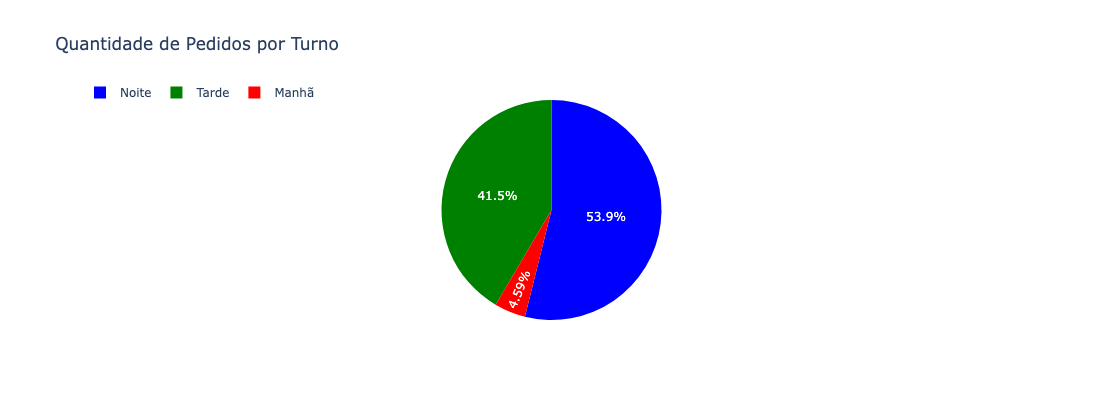

In [74]:

fig = px.pie(
    df_agg_turno, 
    names='Turno', 
    values='Quantidade', 
    title='Quantidade de Pedidos por Turno',
    # category_orders={"meal_type": ['Manhã', 'Tarde', 'Noite']}, 
    color_discrete_sequence=['blue', 'green', 'red']
)

fig.update_layout(width=800, height=400)
fig.update_layout(legend=dict(orientation="h", x=0, y=1.1))
fig.show()


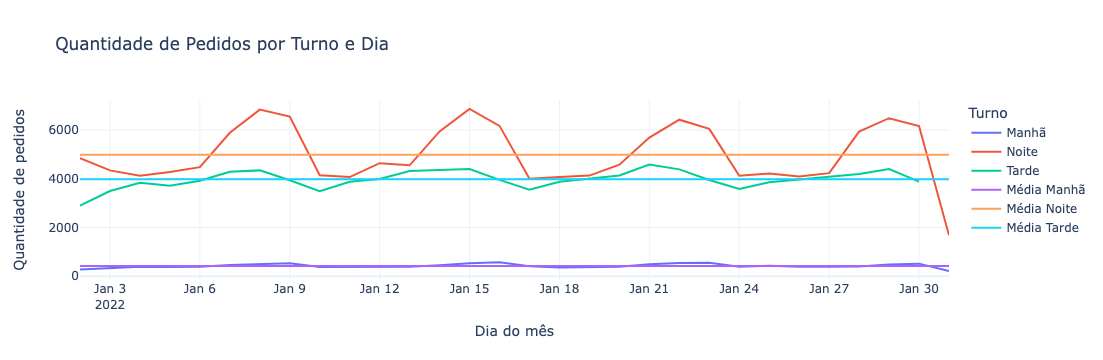

In [79]:

fig = px.line(
    df_agg_dia_turno, 
    x='Dia', 
    y='Quantidade', 
    color='Turno', 
    title='Quantidade de Pedidos por Turno e Dia',
)

# Adiciona as médias ao gráfico
for turno, mean in zip(mean_turno['Turno'], mean_turno['Quantidade']):
    fig.add_trace(go.Scatter(x=df_agg_dia_turno['Dia'], y=[mean] * len(df_agg_dia_turno), mode='lines', name=f'Média {turno}'))

fig.update_layout(
    template="plotly_white",
)

# Altere os rótulos dos eixos x e y
fig.update_xaxes(title_text="Dia do mês")
fig.update_yaxes(title_text="Quantidade de pedidos")

fig.show()
